<a href="https://colab.research.google.com/github/Ipal23/-Advanced-Yield-Farming-Strategies-Analysis/blob/main/_Advanced_Yield_Farming_Strategies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-1-f7becbbd7916>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cumulative Return (%)', y='Strategy', data=df, palette='viridis')
<ipython-input-1-f7becbbd7916>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `l

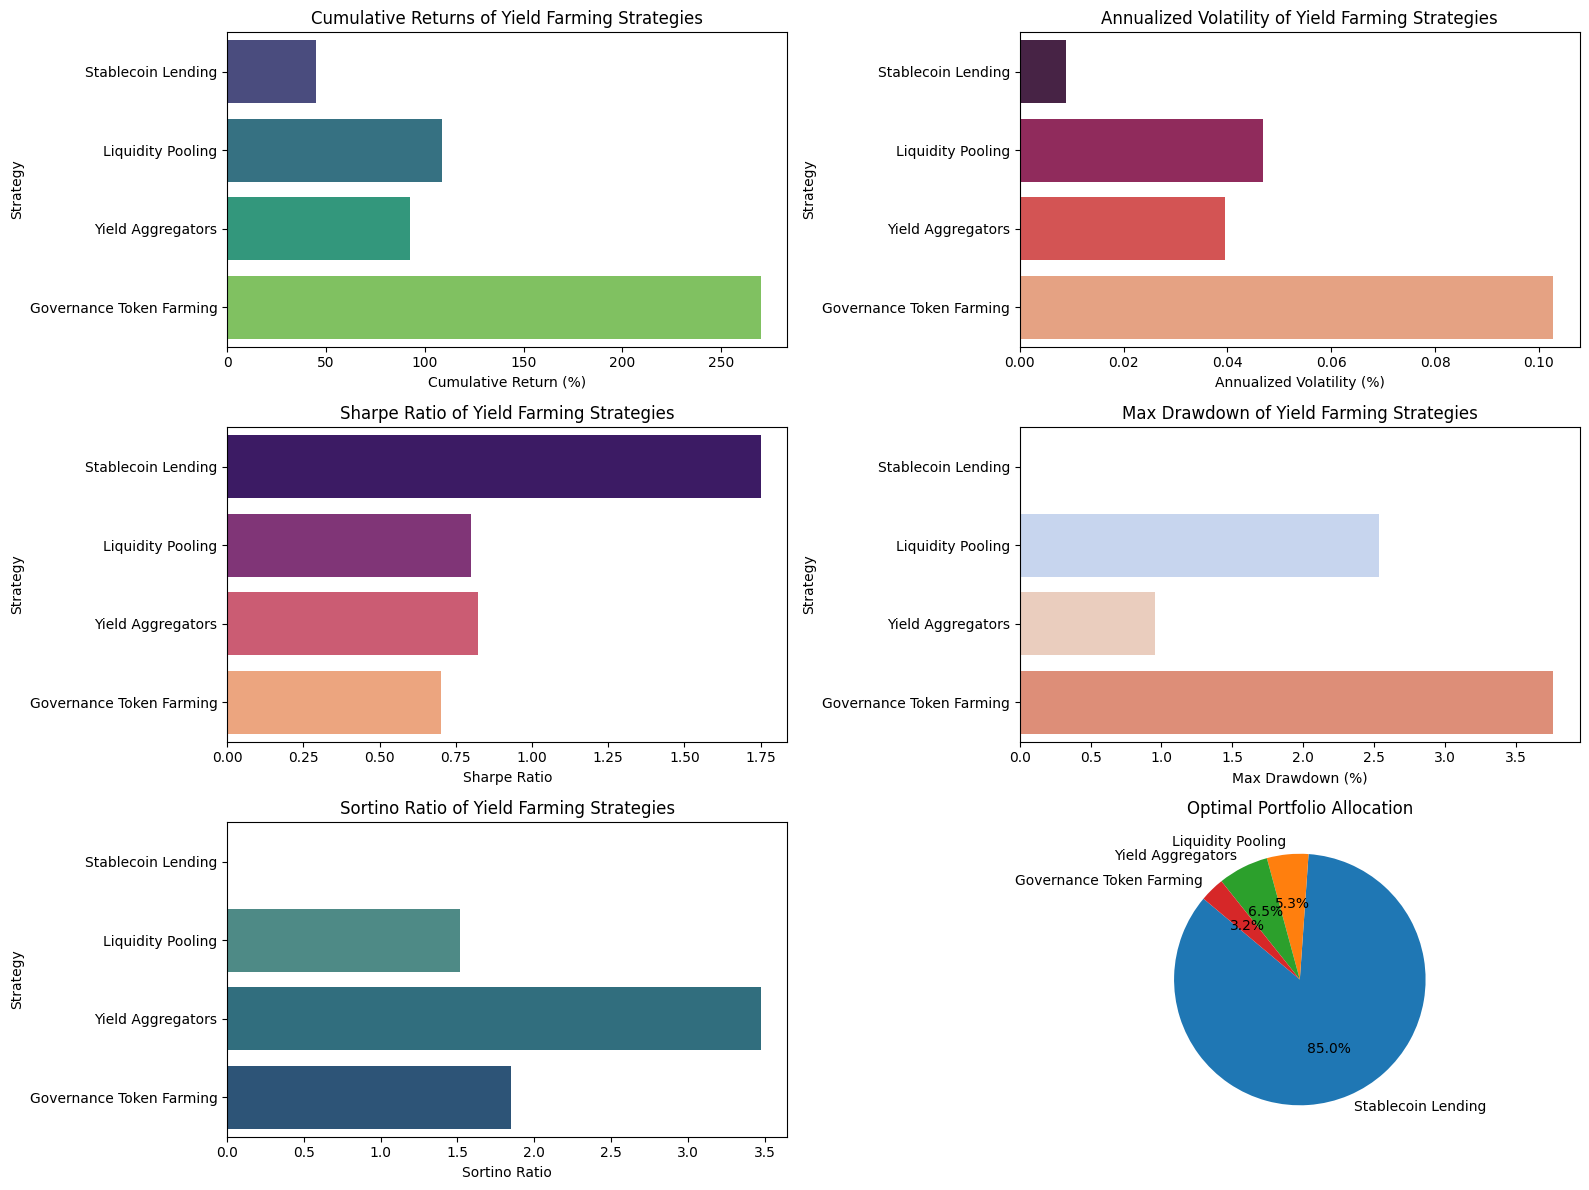

,Strategy,Base APY (%),Cumulative Return (%),Annualized Volatility (%),Sharpe Ratio,Max Drawdown (%),Sortino Ratio
0,Stablecoin Lending,8,45.042508,0.009009,1.750876,0.000000,NaN
1,Liquidity Pooling,15,108.936220,0.046773,0.798393,2.531276,1.518042
2,Yield Aggregators,12,92.750717,0.039511,0.823678,0.950792,3.475961
3,Governance Token Farming,25,270.060987,0.102769,0.701348,3.762750,1.849533


In [1]:
# Advanced Yield Farming Strategies Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define yield farming strategies with their respective parameters
strategies = {
    'Strategy': ['Stablecoin Lending', 'Liquidity Pooling', 'Yield Aggregators', 'Governance Token Farming'],
    'Base APY (%)': [8, 15, 12, 25],
    'Risk Level': ['Low', 'Medium', 'Medium', 'High'],
    'Volatility (%)': [1, 5, 4, 10]  # Assumed standard deviation of returns
}

# Create a DataFrame
df = pd.DataFrame(strategies)

# Simulation parameters
years = 5
months_per_year = 12
total_months = years * months_per_year

# Simulate historical returns for each strategy over multiple years
simulated_returns = []

for index, row in df.iterrows():
    # Simulate monthly returns using a normal distribution based on the base APY and volatility
    monthly_return = np.random.normal(loc=row['Base APY (%)'] / 100 / months_per_year,
                                       scale=row['Volatility (%)'] / 100 / np.sqrt(months_per_year),
                                       size=total_months)
    simulated_returns.append(monthly_return)

# Calculate cumulative returns and risk metrics
cumulative_returns = [np.prod(1 + returns) - 1 for returns in simulated_returns]
annualized_volatility = [np.std(returns) * np.sqrt(months_per_year) for returns in simulated_returns]

# Calculate Sharpe Ratio (assuming risk-free rate of 2%)
risk_free_rate = 0.02
sharpe_ratios = [(np.mean(returns) - risk_free_rate / months_per_year) / np.std(returns) for returns in simulated_returns]

# Maximum Drawdown calculation
def max_drawdown(returns):
    cumulative = np.cumprod(1 + returns)
    peak = np.maximum.accumulate(cumulative)
    drawdown = (peak - cumulative) / peak
    return np.max(drawdown)

max_drawdowns = [max_drawdown(returns) for returns in simulated_returns]

# Sortino Ratio calculation (using downside deviation)
def sortino_ratio(returns):
    downside_returns = returns[returns < 0]
    downside_deviation = np.std(downside_returns)
    return (np.mean(returns) - risk_free_rate / months_per_year) / downside_deviation if downside_deviation != 0 else np.nan

sortino_ratios = [sortino_ratio(returns) for returns in simulated_returns]

# Update DataFrame with calculated metrics
df['Cumulative Return (%)'] = [cum_return * 100 for cum_return in cumulative_returns]
df['Annualized Volatility (%)'] = annualized_volatility
df['Sharpe Ratio'] = sharpe_ratios
df['Max Drawdown (%)'] = [md * 100 for md in max_drawdowns]
df['Sortino Ratio'] = sortino_ratios

# Portfolio Optimization using Mean-Variance Optimization
from scipy.optimize import minimize

def portfolio_metrics(weights):
    portfolio_return = np.dot(weights, df['Cumulative Return (%)']) / 100
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(np.cov(simulated_returns), weights)))
    return -portfolio_return / portfolio_volatility  # Objective function to minimize

num_strategies = len(df)
initial_weights = num_strategies * [1. / num_strategies]  # Equal allocation

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights must sum to 1
bounds = tuple((0, 1) for _ in range(num_strategies))  # Weights must be between 0 and 1

optimal_solution = minimize(portfolio_metrics, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = optimal_solution.x

# Visualization of results
plt.figure(figsize=(16, 12))

# Cumulative Returns Bar Plot
plt.subplot(3, 2, 1)
sns.barplot(x='Cumulative Return (%)', y='Strategy', data=df, palette='viridis')
plt.title('Cumulative Returns of Yield Farming Strategies')
plt.xlabel('Cumulative Return (%)')

# Annualized Volatility Bar Plot
plt.subplot(3, 2, 2)
sns.barplot(x='Annualized Volatility (%)', y='Strategy', data=df, palette='rocket')
plt.title('Annualized Volatility of Yield Farming Strategies')
plt.xlabel('Annualized Volatility (%)')

# Sharpe Ratio Bar Plot
plt.subplot(3, 2, 3)
sns.barplot(x='Sharpe Ratio', y='Strategy', data=df, palette='magma')
plt.title('Sharpe Ratio of Yield Farming Strategies')
plt.xlabel('Sharpe Ratio')

# Max Drawdown Bar Plot
plt.subplot(3, 2, 4)
sns.barplot(x='Max Drawdown (%)', y='Strategy', data=df, palette='coolwarm')
plt.title('Max Drawdown of Yield Farming Strategies')
plt.xlabel('Max Drawdown (%)')

# Sortino Ratio Bar Plot
plt.subplot(3, 2, 5)
sns.barplot(x='Sortino Ratio', y='Strategy', data=df, palette='crest')
plt.title('Sortino Ratio of Yield Farming Strategies')
plt.xlabel('Sortino Ratio')

# Optimal Portfolio Allocation Pie Chart
plt.subplot(3, 2, 6)
plt.pie(optimal_weights * 100, labels=df['Strategy'], autopct='%1.1f%%', startangle=140)
plt.title('Optimal Portfolio Allocation')

plt.tight_layout()
plt.show()

# Display the DataFrame for reference with optimal weights included
df[['Strategy', 'Base APY (%)', 'Cumulative Return (%)', 'Annualized Volatility (%)',
    'Sharpe Ratio', 'Max Drawdown (%)', 'Sortino Ratio']]